In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('Data/raw_residential_data.csv')
df2 = pd.read_csv('Data/raw_address_points.csv')

C:\Users\X\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Identify all categorical variables

#categories = [['CNDTN_D','CNDTN'],['HEAT_D','HEAT'],['STYLE_D','STYLE'],['STRUCT_D','STRUCT'],['GRADE_D','GRADE'],['ROOF_D','ROOF'],['EXTWALL_D','EXTWALL'],['INTWALL_D','INTWALL']]
#cat_drop = []
#for c in categories:
 #   round(df1[c[1]])
 #   cat_drop.append(c[0])
    
# eliminate redundant dummy variables
#df1.drop(cat_drop, inplace=True, axis=1)

bins = [0, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['50+','50','40','30','20','10','0']
df1['YR_RMDL_ClASS'] = pd.cut(df1['YR_RMDL'], bins=bins, labels=labels)
df1['YR_RMDL_ClASS'] = df1['YR_RMDL_ClASS'].replace(np.nan, 'NONE', regex=True)
#eliminate unnecessary variables
#df1.drop(['BLDG_NUM','PRICE','QUALIFIED','EYB','USECODE','GIS_LAST_MOD_DTTM'], inplace=True, axis=1)

In [3]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values. Categorical are imputed with the most frequent value.
        Others are imputed with mean.
        """
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
df = DataFrameImputer().fit_transform(df1)
int_col = ['BATHRM','HF_BATHRM','HEAT','NUM_UNITS','ROOMS','BEDRM','AYB','STORIES','STYLE','STRUCT',
           'EXTWALL','ROOF','INTWALL','KITCHENS','FIREPLACES','LANDAREA']
for i in int_col:
    df[i] = df[i].astype('int64')
df.describe(include='all')

,OBJECTID,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,YR_RMDL_ClASS
count,107154.00000,107154,107154.000000,107154.000000,107154.000000,107154,107154,107154.000000,107154.000000,107154.000000,...,107154.000000,107154,107154.000000,107154,107154.000000,107154.000000,107154.000000,107154.000000,107154,107154
unique,NaN,107087,NaN,NaN,NaN,14,3,NaN,NaN,NaN,...,NaN,16,NaN,12,NaN,NaN,NaN,NaN,1,8
top,NaN,5881S 0004,NaN,NaN,NaN,Hot Water Rad,Y,NaN,NaN,NaN,...,NaN,Built Up,NaN,Hardwood,NaN,NaN,NaN,NaN,2018-07-22T18:01:43.000Z,NONE
freq,NaN,5,NaN,NaN,NaN,44079,66581,NaN,NaN,NaN,...,NaN,31564,NaN,83978,NaN,NaN,NaN,NaN,107154,57708
mean,53577.50000,NaN,2.033186,0.607117,7.647778,NaN,NaN,1.198107,7.360033,3.372893,...,3.989464,NaN,6.144540,NaN,1.219348,0.620499,13.138390,3419.642029,NaN,NaN
std,30932.83971,NaN,1.064493,0.616372,5.038769,NaN,NaN,0.597237,2.345446,1.150193,...,3.348786,NaN,1.957714,NaN,0.621375,0.894668,4.992594,6122.659252,NaN,NaN
min,1.00000,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,26789.25000,NaN,1.000000,0.000000,1.000000,NaN,NaN,1.000000,6.000000,3.000000,...,1.000000,NaN,6.000000,NaN,1.000000,0.000000,11.000000,1599.000000,NaN,NaN
50%,53577.50000,NaN,2.000000,1.000000,7.000000,NaN,NaN,1.000000,7.000000,3.000000,...,2.000000,NaN,6.000000,NaN,1.000000,0.000000,12.000000,2363.000000,NaN,NaN
75%,80365.75000,NaN,3.000000,1.000000,13.000000,NaN,NaN,1.000000,8.000000,4.000000,...,6.000000,NaN,6.000000,NaN,1.000000,1.000000,13.000000,4199.000000,NaN,NaN


C:\Users\X\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


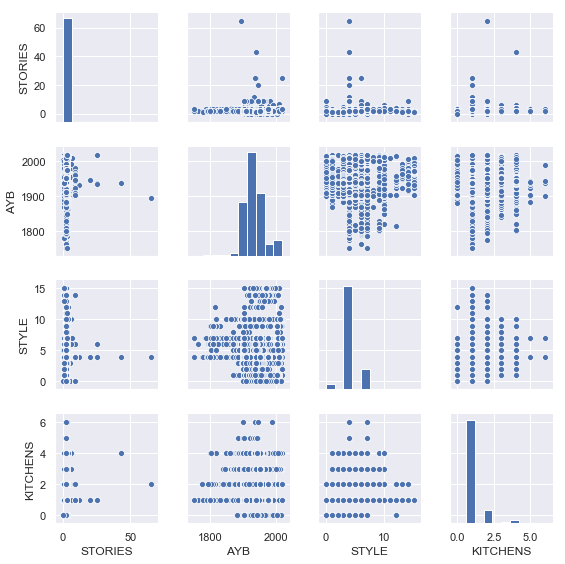

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
plotVar = ['STORIES','AYB','STYLE','KITCHENS']

#remove false records and replot
df = df[df.STORIES < 200]
df = df[df.AYB > 1500]
df = df[df.STYLE < 25]
df = df[df.KITCHENS < 20]
df = df[df.ROOMS < 100]
df = df[df.ROOMS >= df.BEDRM]
sns.pairplot(df[plotVar], size=2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106510 entries, 0 to 107153
Data columns (total 40 columns):
OBJECTID             106510 non-null int64
SSL                  106510 non-null object
BATHRM               106510 non-null int64
HF_BATHRM            106510 non-null int64
HEAT                 106510 non-null int64
HEAT_D               106510 non-null object
AC                   106510 non-null object
NUM_UNITS            106510 non-null int64
ROOMS                106510 non-null int64
BEDRM                106510 non-null int64
AYB                  106510 non-null int64
YR_RMDL              106510 non-null float64
EYB                  106510 non-null int64
STORIES              106510 non-null int64
SALEDATE             106510 non-null object
PRICE                106510 non-null float64
QUALIFIED            106510 non-null object
SALE_NUM             106510 non-null int64
GBA                  106510 non-null int64
BLDG_NUM             106510 non-null int64
STYLE               

In [5]:
# One-hot encode the categorical data
tmp_df1 = pd.get_dummies(df.HEAT_D,prefix='HEAT')
#tmp_df2 = pd.get_dummies(df.WARD,prefix='WARD')
tmp_df3 = pd.get_dummies(df.YR_RMDL_ClASS,prefix='YR_RMDL_ClASS')
tmp_df4 = pd.get_dummies(df.STYLE_D,prefix='STYLE')
tmp_df5 = pd.get_dummies(df.STRUCT_D,prefix='STRUCT')
tmp_df6 = pd.get_dummies(df.GRADE_D,prefix='GRADE')
tmp_df7 = pd.get_dummies(df.CNDTN_D,prefix='CNDTN')

df_clean = pd.concat((df,tmp_df1,tmp_df3,tmp_df4,tmp_df5,tmp_df6,tmp_df7),axis=1)
# Delete unnecessary attributes
df_clean.drop(['OBJECTID','SSL','HEAT','HEAT_D','SALEDATE','QUALIFIED','BLDG_NUM','YR_RMDL_ClASS','STYLE_D','STYLE',\
                 'STRUCT_D','STRUCT','GRADE_D','GRADE','CNDTN_D','CNDTN',\
                 'EXTWALL','EXTWALL_D','ROOF','ROOF_D','INTWALL','INTWALL_D','USECODE','GIS_LAST_MOD_DTTM'\
                 #,'ASSESSMENT_NBHD','WARD'
              ], axis=1, inplace=True)

#Map amd convert the AC attribute to binary
mapping = {'Y': 1, 'N': -1}
df_clean = df_clean.replace({'AC': mapping})
df_clean['AC']=df_clean['AC'].astype(np.int64)

df_final = (df_clean-df_clean.mean())/df_clean.std()
df_final.head(5)

,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,GRADE_No Data,GRADE_Superior,GRADE_Very Good,CNDTN_Average,CNDTN_Default,CNDTN_Excellent,CNDTN_Fair,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good
0,1.847752,-0.985985,0.779095,1.342556,0.268766,0.572460,-0.843739,-1.291000,0.177752,1.85599,...,-0.012257,-0.15899,3.296761,-1.095702,-0.012257,-0.112919,-0.111935,1.358430,-0.040683,-0.287219
1,0.907904,0.636429,0.779095,1.342556,1.575323,1.479807,-1.267219,0.277273,0.177752,1.85599,...,-0.012257,-0.15899,3.296761,-1.095702,-0.012257,-0.112919,-0.111935,1.358430,-0.040683,-0.287219
2,0.907904,0.636429,0.779095,1.342556,0.704285,1.479807,-0.843739,0.442354,0.517486,1.85599,...,-0.012257,-0.15899,3.296761,-1.095702,-0.012257,-0.112919,-0.111935,-0.736137,-0.040683,3.481627
3,0.907904,0.636429,0.779095,1.342556,0.268766,1.479807,-1.196639,-0.052890,0.517486,1.85599,...,-0.012257,-0.15899,3.296761,-1.095702,-0.012257,-0.112919,-0.111935,1.358430,-0.040683,-0.287219
4,-0.031943,0.636429,0.779095,-0.332376,1.575323,-0.334886,-0.737869,0.689976,0.545797,1.85599,...,-0.012257,-0.15899,3.296761,-1.095702,-0.012257,-0.112919,-0.111935,1.358430,-0.040683,-0.287219


In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106510 entries, 0 to 107153
Data columns (total 83 columns):
BATHRM                   106510 non-null float64
HF_BATHRM                106510 non-null float64
AC                       106510 non-null float64
NUM_UNITS                106510 non-null float64
ROOMS                    106510 non-null float64
BEDRM                    106510 non-null float64
AYB                      106510 non-null float64
YR_RMDL                  106510 non-null float64
EYB                      106510 non-null float64
STORIES                  106510 non-null float64
PRICE                    106510 non-null float64
SALE_NUM                 106510 non-null float64
GBA                      106510 non-null float64
KITCHENS                 106510 non-null float64
FIREPLACES               106510 non-null float64
LANDAREA                 106510 non-null float64
HEAT_Air Exchng          106510 non-null float64
HEAT_Air-Oil             106510 non-null float64
HEAT_El

# Model and Evaluation 1

Train and Adjust Parameters

### KMeans

For n_clusters = 3 The average silhouette_score is : 0.64
For n_clusters = 5 The average silhouette_score is : 0.55
For n_clusters = 7 The average silhouette_score is : 0.53
For n_clusters = 9 The average silhouette_score is : 0.51
For n_clusters = 11 The average silhouette_score is : 0.51


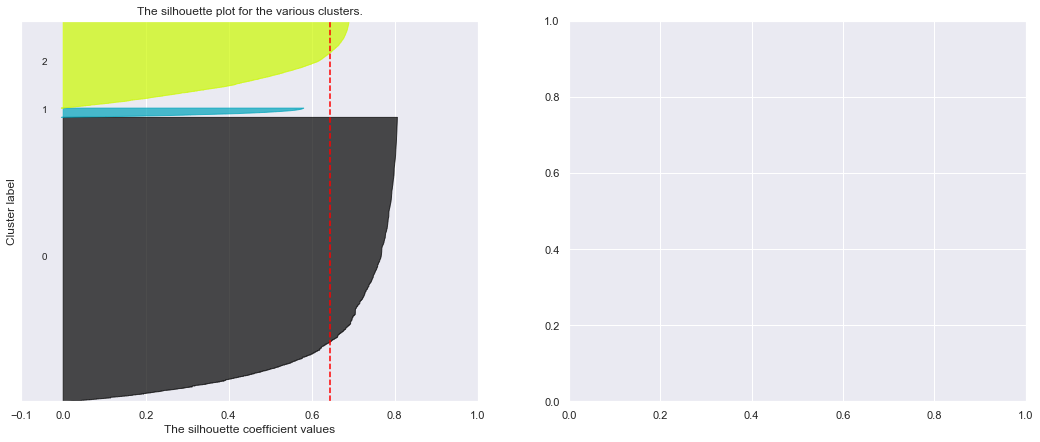

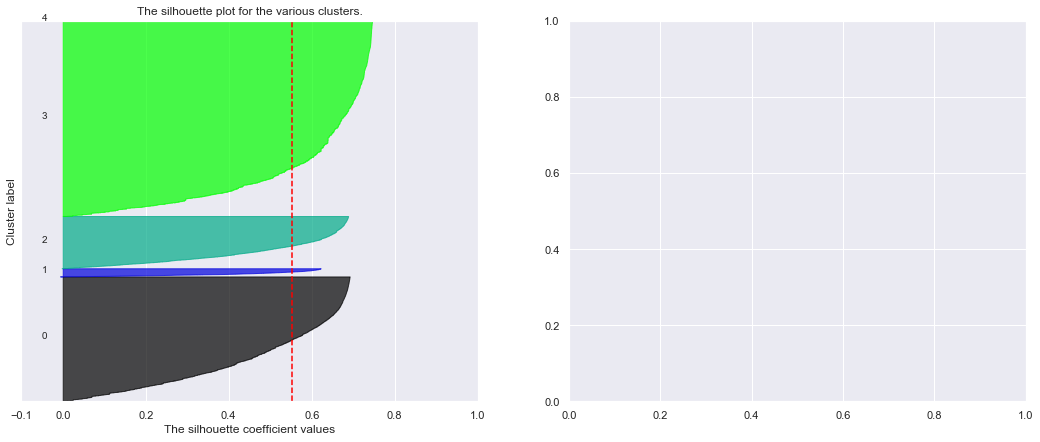

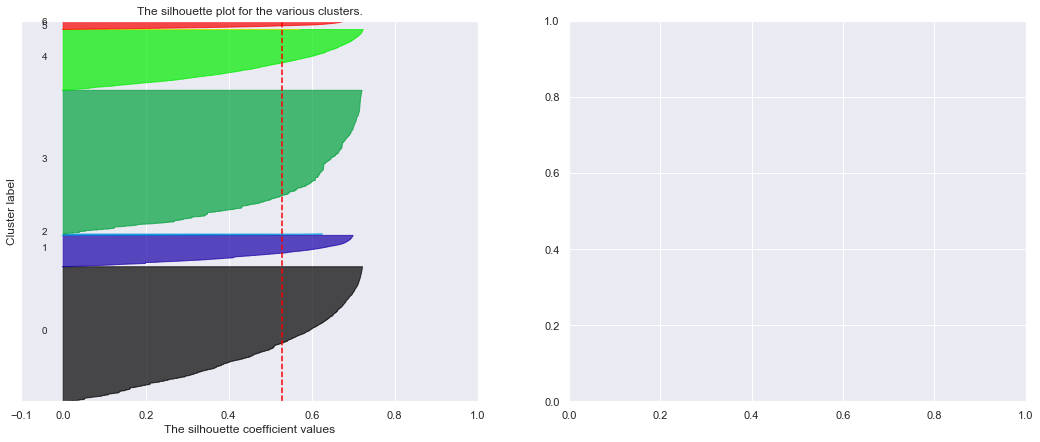

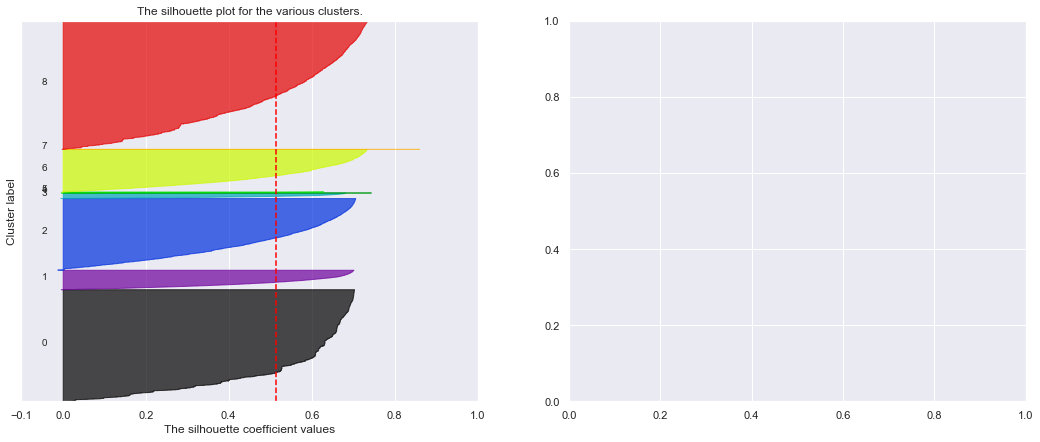

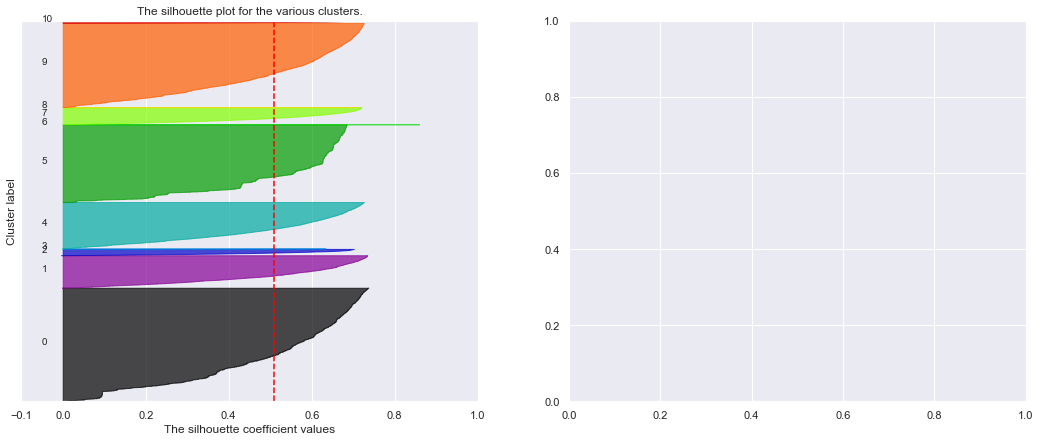

In [11]:
%%time

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X1 = df[['BATHRM','ROOMS','AYB','GBA']]

range_n_clusters = [3,5,7,9,11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1, cluster_labels)
    #X = np.column_stack((X,pd.get_dummies(cluster_labels)))
    #acc = cross_val_score(lr_clf,X,y=y,cv=5)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", round(silhouette_avg,2),
        # "Average accuracy (with kmeans for class/fare)= ", round(acc.mean()*100,2), "+-", round(acc.std()*100,2)
         )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ## 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X1['GBA'], X1['AC'], s=20,
    #            c=colors)

    ## Labeling the clusters
    #centers = clusterer.cluster_centers_
    ## Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #            c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #   ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #               s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("GBA (normalized)")
   # ax2.set_ylabel("AC")

    #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
    #              "with n_clusters = %d" % n_clusters),
     #            fontsize=14, fontweight='bold')

plt.show()

## Should we do graph that shows how to set eps for DBSCAN?  DBSCAN not good with many dimensions ...

In [13]:
%%time

X1 = df[['BATHRM','ROOMS','AYB','GBA']]

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

for eps in [0.1, 1, 10]:
    for mpts in [2,4,8]:

        DBSCAN_cluster_labels = DBSCAN(eps=eps, min_samples=mpts).fit_predict(X1)

        silhouette_avg = silhouette_score(X1,  DBSCAN_cluster_labels)
        #X = np.column_stack((X,pd.get_dummies(cluster_labels)))
        #acc = cross_val_score(lr_clf,X,y=y,cv=5)
        print("For eps =", eps,
          "For mpts =", mpts,
          "The average silhouette_score is :", round(silhouette_avg,2))#,
         #"Average accuracy (with DBSCAN for LATITUDE/LONGITUDE)= ", round(acc.mean()*100,2), "+-", round(acc.std()*100,2))

For eps = 0.1 For mpts = 2 The average silhouette_score is : -0.13
For eps = 0.1 For mpts = 4 The average silhouette_score is : -0.47
For eps = 0.1 For mpts = 8 The average silhouette_score is : -0.64
For eps = 1 For mpts = 2 The average silhouette_score is : -0.1
For eps = 1 For mpts = 4 The average silhouette_score is : -0.27
For eps = 1 For mpts = 8 The average silhouette_score is : -0.42
For eps = 10 For mpts = 2 The average silhouette_score is : -0.86
For eps = 10 For mpts = 4 The average silhouette_score is : -0.83
For eps = 10 For mpts = 8 The average silhouette_score is : -0.73
Wall time: 37min 4s


### Agglomerative Clustering

In [7]:
%%time 

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import silhouette_samples, silhouette_score

X1 = df[['BATHRM','ROOMS','AYB','GBA']]

knn_graph = kneighbors_graph(X1, 30, include_self=False)

for link in ['complete', 'average']:  #'ward', 
    for n_cls in [3,5,7,9,11]:

        # Fit model and get labels
        cls_agg_labels = AgglomerativeClustering(n_clusters=n_cls, linkage=link, connectivity=knn_graph).fit_predict(X1)
        
        # get the silhouette score
        silhouette_avg = silhouette_score(X1, cls_agg_labels)

        # Output
        print ("For Linkage type: ", link, "and number of clusters = ", n_cls, \
               ":  The Average Silhouette Score is ", silhouette_avg)

For Linkage type:  complete and number of clusters =  3 :  The Average Silhouette Score is  0.9654788288721777
For Linkage type:  complete and number of clusters =  5 :  The Average Silhouette Score is  0.9438871131368279
For Linkage type:  complete and number of clusters =  7 :  The Average Silhouette Score is  0.9404913522488116
For Linkage type:  complete and number of clusters =  9 :  The Average Silhouette Score is  0.9228104953762567
For Linkage type:  complete and number of clusters =  11 :  The Average Silhouette Score is  0.9130885141381108
For Linkage type:  average and number of clusters =  3 :  The Average Silhouette Score is  0.9654788288721777
For Linkage type:  average and number of clusters =  5 :  The Average Silhouette Score is  0.9438871131368279
For Linkage type:  average and number of clusters =  7 :  The Average Silhouette Score is  0.943865923142596
For Linkage type:  average and number of clusters =  9 :  The Average Silhouette Score is  0.9228104953762567
For L